In [31]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [3]:
type(data)


dict

In [4]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10553,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.954589e+07,1.954589e+07,False,NaN,1,NaN,NaN,None,2023-11-18T17:40:00.000Z,36645.685141,1.384117e+10,-46.4326,-0.121627,0.619816,-1.252681,28.299983,34.598603,40.312681,7.162724e+11,51.4574,7.695594e+11,None,2023-11-18T17:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 12:40:46.223514
1,1027,Ethereum,ETH,ethereum,7800,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202527e+08,1.202527e+08,True,NaN,2,NaN,NaN,None,2023-11-18T17:40:00.000Z,1967.905720,8.963424e+09,-34.2940,0.541799,1.505449,-5.209942,25.853350,19.302576,17.441703,2.366460e+11,16.9967,2.366460e+11,None,2023-11-18T17:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 12:40:46.223514
2,825,Tether USDt,USDT,tether,65968,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.767828e+10,9.062328e+10,True,NaN,3,NaN,NaN,None,2023-11-18T17:39:00.000Z,1.000551,3.320334e+10,-35.4200,0.001123,0.043924,0.021742,0.021336,0.033588,0.067514,8.772657e+10,6.3018,9.067319e+10,None,2023-11-18T17:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-18 12:40:46.223514
3,1839,BNB,BNB,bnb,1768,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517007e+08,1.517007e+08,False,NaN,4,NaN,NaN,None,2023-11-18T17:39:00.000Z,244.442658,7.050727e+08,-19.2201,0.215734,0.698920,-3.436634,16.062129,12.323601,12.808760,3.708213e+10,2.6636,3.708213e+10,None,2023-11-18T17:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 12:40:46.223514
4,52,XRP,XRP,xrp,1144,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.371831e+10,9.998822e+10,False,NaN,5,NaN,NaN,None,2023-11-18T17:40:00.000Z,0.609919,9.046236e+08,-45.8989,0.378521,1.131048,-9.113855,25.483552,18.756273,13.095766,3.276381e+10,2.3532,6.099188e+10,None,2023-11-18T17:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 12:40:46.223514
5,5426,Solana,SOL,solana,547,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.228703e+08,5.628114e+08,True,NaN,6,NaN,NaN,None,2023-11-18T17:40:00.000Z,58.314268,2.089916e+09,-44.3261,0.298436,2.891825,-0.422850,134.530435,191.832992,167.703401,2.465937e+10,1.7711,3.281994e+10,None,2023-11-18T17:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 12:40:46.223514
6,3408,USDC,USDC,usd-coin,14997,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.439682e+10,2.439682e+10,False,NaN,7,NaN,NaN,None,2023-11-18T17:40:00.000Z,1.000163,3.923992e+09,-39.5428,0.025651,0.010639,0.030623,-0.007907,-0.001231,-0.000489,2.440081e+10,1.7525,2.440081e+10,None,2023-11-18T17:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-18 12:40:46.223514
7,2010,Cardano,ADA,cardano,975,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.527849e+10,3.636539e+10,False,NaN,8,NaN,NaN,None,2023-11-18T17:39:00.000Z,0.372506,3.413761e+08,-36.1756,0.721758,2.654175,-4.403926,52.626168,45.510713,37.301045,1.314146e+10,0.9440,1.676278e+10,None,2023-11-18T17:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 12:40:46.223514
8,74,Dogecoin,DOGE,dogecoin,825,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,

In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


In [7]:
import os
from time import sleep

def api_runner():
    print("Running API runner function")

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)  

exit()


Running API runner function
API Runner completed
Running API runner function
API Runner completed
Running API runner function
API Runner completed
Running API runner function
API Runner completed
Running API runner function
API Runner completed
Running API runner function
API Runner completed
Running API runner function
API Runner completed


KeyboardInterrupt: 

In [8]:
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10553,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.954589e+07,1.954589e+07,False,NaN,1,NaN,NaN,None,2023-11-18T17:40:00.000Z,36645.685141,1.384117e+10,-46.4326,-0.121627,0.619816,-1.252681,28.299983,34.598603,40.312681,7.162724e+11,51.4574,7.695594e+11,None,2023-11-18T17:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 12:40:46.223514
1,1027,Ethereum,ETH,ethereum,7800,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202527e+08,1.202527e+08,True,NaN,2,NaN,NaN,None,2023-11-18T17:40:00.000Z,1967.905720,8.963424e+09,-34.2940,0.541799,1.505449,-5.209942,25.853350,19.302576,17.441703,2.366460e+11,16.9967,2.366460e+11,None,2023-11-18T17:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 12:40:46.223514
2,825,Tether USDt,USDT,tether,65968,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.767828e+10,9.062328e+10,True,NaN,3,NaN,NaN,None,2023-11-18T17:39:00.000Z,1.000551,3.320334e+10,-35.4200,0.001123,0.043924,0.021742,0.021336,0.033588,0.067514,8.772657e+10,6.3018,9.067319e+10,None,2023-11-18T17:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-18 12:40:46.223514
3,1839,BNB,BNB,bnb,1768,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517007e+08,1.517007e+08,False,NaN,4,NaN,NaN,None,2023-11-18T17:39:00.000Z,244.442658,7.050727e+08,-19.2201,0.215734,0.698920,-3.436634,16.062129,12.323601,12.808760,3.708213e+10,2.6636,3.708213e+10,None,2023-11-18T17:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 12:40:46.223514
4,52,XRP,XRP,xrp,1144,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.371831e+10,9.998822e+10,False,NaN,5,NaN,NaN,None,2023-11-18T17:40:00.000Z,0.609919,9.046236e+08,-45.8989,0.378521,1.131048,-9.113855,25.483552,18.756273,13.095766,3.276381e+10,2.3532,6.099188e+10,None,2023-11-18T17:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 12:40:46.223514
5,5426,Solana,SOL,solana,547,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.228703e+08,5.628114e+08,True,NaN,6,NaN,NaN,None,2023-11-18T17:40:00.000Z,58.314268,2.089916e+09,-44.3261,0.298436,2.891825,-0.422850,134.530435,191.832992,167.703401,2.465937e+10,1.7711,3.281994e+10,None,2023-11-18T17:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 12:40:46.223514
6,3408,USDC,USDC,usd-coin,14997,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.439682e+10,2.439682e+10,False,NaN,7,NaN,NaN,None,2023-11-18T17:40:00.000Z,1.000163,3.923992e+09,-39.5428,0.025651,0.010639,0.030623,-0.007907,-0.001231,-0.000489,2.440081e+10,1.7525,2.440081e+10,None,2023-11-18T17:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-18 12:40:46.223514
7,2010,Cardano,ADA,cardano,975,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.527849e+10,3.636539e+10,False,NaN,8,NaN,NaN,None,2023-11-18T17:39:00.000Z,0.372506,3.413761e+08,-36.1756,0.721758,2.654175,-4.403926,52.626168,45.510713,37.301045,1.314146e+10,0.9440,1.676278e+10,None,2023-11-18T17:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 12:40:46.223514
8,74,Dogecoin,DOGE,dogecoin,825,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,

In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10553,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19545887.00000,19545887.00000,False,NaN,1,NaN,NaN,None,2023-11-18T17:40:00.000Z,36645.68514,13841171223.73156,-46.43260,-0.12163,0.61982,-1.25268,28.29998,34.59860,40.31268,716272420799.23889,51.45740,769559387956.34998,None,2023-11-18T17:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 12:40:46.223514
1,1027,Ethereum,ETH,ethereum,7800,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120252716.63066,120252716.63066,True,NaN,2,NaN,NaN,None,2023-11-18T17:40:00.000Z,1967.90572,8963423997.12111,-34.29400,0.54180,1.50545,-5.20994,25.85335,19.30258,17.44170,236646008937.09521,16.99670,236646008937.10001,None,2023-11-18T17:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 12:40:46.223514
2,825,Tether USDt,USDT,tether,65968,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,87678283982.64670,90623279059.65834,True,NaN,3,NaN,NaN,None,2023-11-18T17:39:00.000Z,1.00055,33203340770.43806,-35.42000,0.00112,0.04392,0.02174,0.02134,0.03359,0.06751,87726572934.26326,6.30180,90673189971.91000,None,2023-11-18T17:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-18 12:40:46.223514
3,1839,BNB,BNB,bnb,1768,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151700715.38898,151700715.38898,False,NaN,4,NaN,NaN,None,2023-11-18T17:39:00.000Z,244.44266,705072674.52063,-19.22010,0.21573,0.69892,-3.43663,16.06213,12.32360,12.80876,37082126094.24232,2.66360,37082126094.24000,None,2023-11-18T17:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 12:40:46.223514
4,52,XRP,XRP,xrp,1144,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53718306475.00000,99988221902.00000,False,NaN,5,NaN,NaN,None,2023-11-18T17:40:00.000Z,0.60992,904623600.77441,-45.89890,0.37852,1.13105,-9.11385,25.48355,18.75627,13.09577,32763807257.42411,2.35320,60991884159.03000,None,2023-11-18T17:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 12:40:46.223514
5,5426,Solana,SOL,solana,547,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,422870273.31585,562811424.81444,True,NaN,6,NaN,NaN,None,2023-11-18T17:40:00.000Z,58.31427,2089916022.64955,-44.32610,0.29844,2.89183,-0.42285,134.53044,191.83299,167.70340,24659370643.33366,1.77110,32819936520.90000,None,2023-11-18T17:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 12:40:46.223514
6,3408,USDC,USDC,usd-coin,14997,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24396823850.14679,24396823850.14679,False,NaN,7,NaN,NaN,None,2023-11-18T17:40:00.000Z,1.00016,3923992484.87012,-39.54280,0.02565,0.01064,0.03062,-0.00791,-0.00123,-0.00049,24400807295.34362,1.75250,24400807295.34000,None,2023-11-18T17:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-18 12:40:46.223514
7,2010,Cardano,ADA,cardano,975,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35278493003.12300,36365391092.90400,False,NaN,8,NaN,NaN,None,2023-11-18T17:39:00.000Z,0.37251,341376056.83671,-36.17560,0.72176,2.65418,-4.40393,52.62617,45.51071,37.30105,13141459084.42195,0.94400,16762781186.45000,None,2023-11-18T17:39:00.000Z,Na

In [11]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.12163,0.61982,-1.25268,28.29998,34.59860,40.31268
Ethereum,0.54180,1.50545,-5.20994,25.85335,19.30258,17.44170
Tether USDt,0.00112,0.04392,0.02174,0.02134,0.03359,0.06751
BNB,0.21573,0.69892,-3.43663,16.06213,12.32360,12.80876
XRP,0.37852,1.13105,-9.11385,25.48355,18.75627,13.09577
Solana,0.29844,2.89183,-0.42285,134.53044,191.83299,167.70340
USDC,0.02565,0.01064,0.03062,-0.00791,-0.00123,-0.00049
Cardano,0.72176,2.65418,-4.40393,52.62617,45.51071,37.30105
Dogecoin,-0.02846,-2.96343,1.75505,37.76290,28.02507,25.99519


In [12]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.12163
             quote.USD.percent_change_24h     0.61982
             quote.USD.percent_change_7d     -1.25268
             quote.USD.percent_change_30d    28.29998
             quote.USD.percent_change_60d    34.59860
             quote.USD.percent_change_90d    40.31268
Ethereum     quote.USD.percent_change_1h      0.54180
             quote.USD.percent_change_24h     1.50545
             quote.USD.percent_change_7d     -5.20994
             quote.USD.percent_change_30d    25.85335
             quote.USD.percent_change_60d    19.30258
             quote.USD.percent_change_90d    17.44170
Tether USDt  quote.USD.percent_change_1h      0.00112
             quote.USD.percent_change_24h     0.04392
             quote.USD.percent_change_7d      0.02174
             quote.USD.percent_change_30d     0.02134
             quote.USD.percent_change_60d     0.03359
             quote.USD.percent_change_90

In [13]:
type(df4)


pandas.core.series.Series

In [14]:
df5 = df4.to_frame(name='values')
df5


values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.12163
            quote.USD.percent_change_24h   0.61982
            quote.USD.percent_change_7d   -1.25268
            quote.USD.percent_change_30d  28.29998
            quote.USD.percent_change_60d  34.59860
            quote.USD.percent_change_90d  40.31268
Ethereum    quote.USD.percent_change_1h    0.54180
            quote.USD.percent_change_24h   1.50545
            quote.USD.percent_change_7d   -5.20994
            quote.USD.percent_change_30d  25.85335
            quote.USD.percent_change_60d  19.30258
            quote.USD.percent_change_90d  17.44170
Tether USDt quote.USD.percent_change_1h    0.00112
            quote.USD.percent_change_24h   0.04392
            quote.USD.percent_change_7d    0.02174
            quote.USD.percent_change_30d   0.02134
            quote.USD.percent_change_60d   0.03359
            quote.USD.percent_change_90d   0.06751
BNB         quote.USD.percent_change_1h    0.21573
            quote.USD.percent_change_24h   0.69892
            quote.USD.percent_change_7d   -3.43663
            quote.USD.percent_change_30d  16.06213
            quote.USD.percent_change_60d  12.32360
            quote.USD.percent_change_90d  12.80876
XRP         quote.USD.percent_change_1h    0.37852
            quote.USD.percent_change_24h   1.13105
            quote.USD.percent_change_7d   -9.11385
            quote.USD.percent_change_30d  25.48355
            quote.USD.percent_change_60d  18.75627
            quote.USD.percent_change_90d  13.09577
Solana      quote.USD.percent_change_1h    0.29844
            quote.USD.percent_change_24h   2.89183
            quote.USD.percent_change_7d   -0.42285
            quote.USD.percent_change_30d 134.53044
            quote.USD.percent_change_60d 191.83299
            quote.USD.percent_change_90d 167.70340
USDC        quote.USD.percent_change_1h    0.02565
            quote.USD.percent_change_24h   0.01064
            quote.USD.percent_change_7d    0.03062
            quote.USD.percent_change_30d  -0.00791
            quote.USD.percent_change_60d  -0.00123
            quote.USD.percent_change_90d  -0.00049
Cardano     quote.USD.percent_change_1h    0.72176
            quote.USD.percent_change_24h   2.65418
            quote.USD.percent_change_7d   -4.40393
            quote.USD.percent_change_30d  52.62617
            quote.USD.percent_change_60d  45.51071
            quote.USD.percent_change_90d  37.30105
Dogecoin    quote.USD.percent_change_1h   -0.02846
            quote.USD.percent_change_24h  -2.96343
            quote.USD.percent_change_7d    1.75505
            quote.USD.percent_change_30d  37.76290
            quote.USD.percent_change_60d  28.02507
            quote.USD.percent_change_90d  25.99519
TRON        quote.USD.percent_change_1h    0.06399
            quote.USD.percent_change_24h   0.13812
            quote.USD.percent_change_7d   -5.07739
            quote.USD.percent_change_30d  14.65355
            quote.USD.percent_change_60d  21.38810
            quote.USD.percent_change_90d  35.43452
Toncoin     quote.USD.percent_change_1h    0.05404
            quote.USD.percent_change_24h   2.38866
            quote.USD.percent_change_7d   -4.70582
            quote.USD.percent_change_30d  11.83437
            quote.USD.percent_change_60d  -8.32090
            quote.USD.percent_change_90d  68.21593
Avalanche   quote.USD.percent_change_1h   -0.50938
            quote.USD.percent_change_24h   3.35156
            quote.USD.percent_change_7d   40.86956
            quote.USD.percent_change_30d 144.63376
            quote.USD.percent_change_60d 138.04356
            quote.USD.percent_change_90d 101.89123
Chainlink   quote.USD.percent_change_1h    1.14195
            quote.USD.percent_change_24h   3.05965
            quote.USD.percent_change_7d  -13.84768
            quote.USD.percent_change_30d  86.57732
            quote.USD.percent_change_60d 101.37104
            quo

In [15]:
df5.count()

values    90
dtype: int64

In [22]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12163
1,Bitcoin,quote.USD.percent_change_24h,0.61982
2,Bitcoin,quote.USD.percent_change_7d,-1.25268
3,Bitcoin,quote.USD.percent_change_30d,28.29998
4,Bitcoin,quote.USD.percent_change_60d,34.59860
5,Bitcoin,quote.USD.percent_change_90d,40.31268
6,Ethereum,quote.USD.percent_change_1h,0.54180
7,Ethereum,quote.USD.percent_change_24h,1.50545
8,Ethereum,quote.USD.percent_change_7d,-5.20994
9,Ethereum,quote.USD.percent_change_30d,25.85335


In [23]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12163
1,Bitcoin,quote.USD.percent_change_24h,0.61982
2,Bitcoin,quote.USD.percent_change_7d,-1.25268
3,Bitcoin,quote.USD.percent_change_30d,28.29998
4,Bitcoin,quote.USD.percent_change_60d,34.59860
5,Bitcoin,quote.USD.percent_change_90d,40.31268
6,Ethereum,quote.USD.percent_change_1h,0.54180
7,Ethereum,quote.USD.percent_change_24h,1.50545
8,Ethereum,quote.USD.percent_change_7d,-5.20994
9,Ethereum,quote.USD.percent_change_30d,25.85335


In [24]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12163
1,Bitcoin,24h,0.61982
2,Bitcoin,7d,-1.25268
3,Bitcoin,30d,28.29998
4,Bitcoin,60d,34.59860
5,Bitcoin,90d,40.31268
6,Ethereum,quote.USD.percent_change_1h,0.54180
7,Ethereum,24h,1.50545
8,Ethereum,7d,-5.20994
9,Ethereum,30d,25.85335


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/alirezataherafshar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


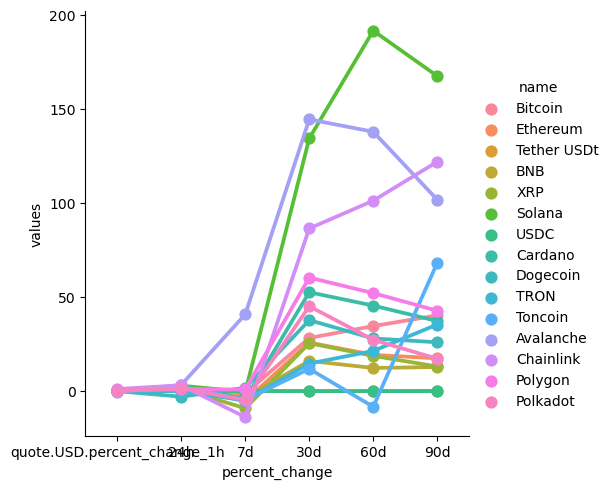

In [26]:
import seaborn as sns

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')



In [27]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,36645.68514,2023-11-18 12:40:46.223514


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

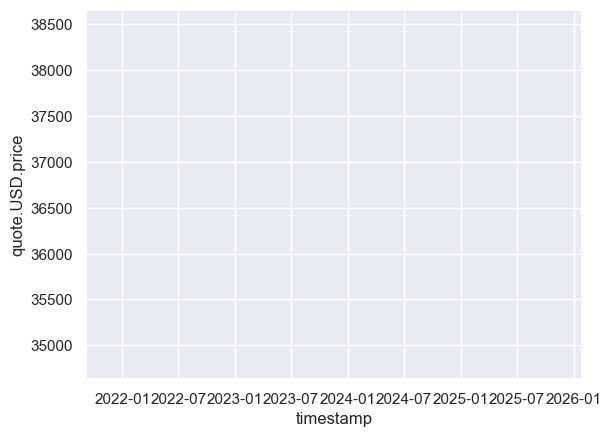

In [29]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)